<a href="https://colab.research.google.com/github/SatoshiYoshino/Python/blob/master/%EF%BC%8820220504%E4%BF%9D%E5%AD%98%E7%89%88%EF%BC%89%E3%82%B9%E3%83%97%E3%83%AC%E3%83%83%E3%83%88%E3%82%B7%E3%83%BC%E3%83%88%E9%80%A3%E6%90%BA2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
!pip install --upgrade -q gspread

In [104]:
from google.colab import auth
auth.authenticate_user()

In [105]:
import gspread
from oauth2client.client import GoogleCredentials

In [106]:
2021年12月くらいまでは動いていましたが2022年5月に実行したらエラーが出るようになっていた。

SyntaxError: ignored

In [ ]:
gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1fR3MI5BL5trGXIjALhk1Bgxa24Q8khflC6MC_rAFTyw/edit#gid=0').sheet1

In [ ]:
# 調べてみると、gspreadでは以前からoauth2clientが非推奨となっていたようでした。

In [1]:
from google.colab import auth
from google.auth import default
import gspread
import pandas as pd
import matplotlib.pyplot as plt

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [2]:
worksheet1 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1fR3MI5BL5trGXIjALhk1Bgxa24Q8khflC6MC_rAFTyw/edit#gid=0').worksheet('sheet1')

In [3]:
df = pd.DataFrame(worksheet1.get_all_values())
df.head()

,0,1,2,3
0,A,B,C,D
1,6131,227,1797,1985
2,4254,3325,8652,8626
3,7740,4360,8862,432
4,6589,6848,7226,7411


In [4]:
#1行目をcolumに登録
df.columns = df. iloc[0]
df.head()

,A,B,C,D
0,A,B,C,D
1,6131,227,1797,1985
2,4254,3325,8652,8626
3,7740,4360,8862,432
4,6589,6848,7226,7411


In [5]:
#0行目がcolumと同じなので削除する
df = df.drop(df.index[[0]])
df.head()

,A,B,C,D
1,6131,227,1797,1985
2,4254,3325,8652,8626
3,7740,4360,8862,432
4,6589,6848,7226,7411
5,7099,964,7474,3191


In [6]:
df.dtypes

0
A    object
B    object
C    object
D    object
dtype: object

In [7]:
#数値に変換
df = df.astype(int)

In [8]:
df.dtypes

0
A    int64
B    int64
C    int64
D    int64
dtype: object

In [9]:
print(df.describe())

0                A            B            C            D
count    76.000000    76.000000    76.000000    76.000000
mean   5680.960526  4775.842105  4954.223684  5281.776316
std    2619.689775  2857.166508  2946.806844  2839.945753
min     230.000000    80.000000   167.000000   337.000000
25%    3937.250000  2509.750000  2238.750000  2887.250000
50%    6320.000000  4680.000000  4726.000000  5008.500000
75%    7589.000000  6891.000000  7695.250000  7763.750000
max    9890.000000  9995.000000  9938.000000  9989.000000


In [10]:
#　seabornで散布図を表示してみる
import seaborn as sns 
import numpy as np

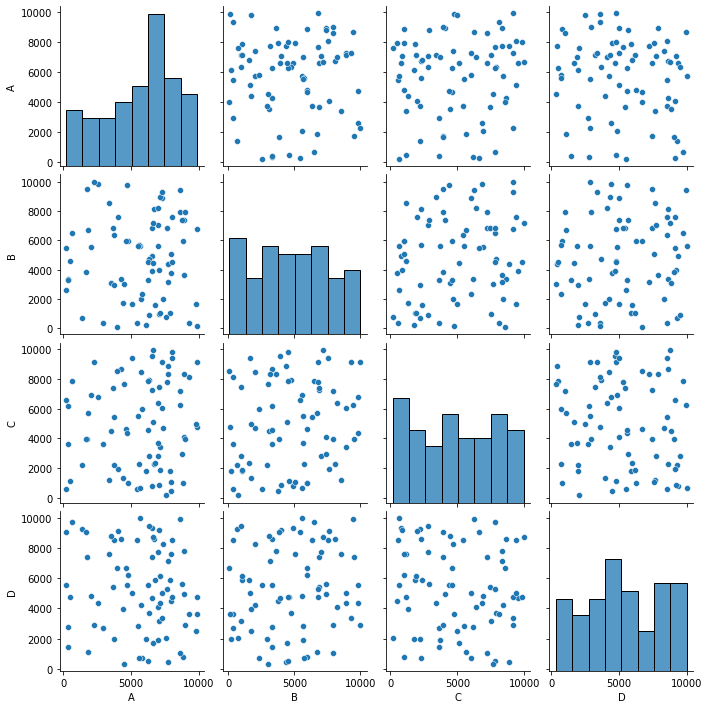

In [11]:
sns.pairplot(df)

In [12]:
from google.colab import auth
from google.auth import default
import gspread
import pandas as pd
import matplotlib.pyplot as plt

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [13]:
worksheet2= gc.open_by_url('https://docs.google.com/spreadsheets/d/1fR3MI5BL5trGXIjALhk1Bgxa24Q8khflC6MC_rAFTyw/edit#gid=0').worksheet('sheet2')

In [14]:
df = pd.DataFrame(worksheet2.get_all_values())
df.head()

,0,1,2,3
0,A,B,C,D
1,"4,508","4,472","2,581","2,097"
2,"2,944","5,930",103,"7,081"
3,"8,810","7,553","2,943",889
4,"3,985","7,954","3,188","5,511"


In [15]:
#1行目をcolumに登録
df.columns = df. iloc[0]
df.head()

,A,B,C,D
0,A,B,C,D
1,"4,508","4,472","2,581","2,097"
2,"2,944","5,930",103,"7,081"
3,"8,810","7,553","2,943",889
4,"3,985","7,954","3,188","5,511"


In [16]:
#0行目がcolumと同じなので削除する
df = df.drop(df.index[[0]])
df.head()

,A,B,C,D
1,"4,508","4,472","2,581","2,097"
2,"2,944","5,930",103,"7,081"
3,"8,810","7,553","2,943",889
4,"3,985","7,954","3,188","5,511"
5,994,"9,566",512,"7,583"


In [17]:
df.dtypes

0
A    object
B    object
C    object
D    object
dtype: object

In [18]:
df3 = df.copy()

In [19]:
df3 = df3.replace(',', '', regex=True)
print(df3)

0      A     B     C     D
1   4508  4472  2581  2097
2   2944  5930   103  7081
3   8810  7553  2943   889
4   3985  7954  3188  5511
5    994  9566   512  7583
..   ...   ...   ...   ...
72  4068  6770  3899  5933
73  8968  4505  8359  6213
74  2893  1076  4522  3874
75  1957  8283  1705  3646
76  4858  6554  1739  1443

[76 rows x 4 columns]


In [36]:
df["A"]=df["A"].str.replace(",","")
df.head()

,A,B,C,D
1,8732,"7,889","4,932",8732
2,6711,"7,392","3,867",6711
3,2173,"6,053","2,772",2173
4,9009,"8,892","3,644",9009
5,8104,768,"1,648",8104


In [26]:
df.replace({",":""})

,A,B,C,D
2,2358,2358,2358,"1,376"
3,7719,7719,7719,"5,358"
4,2013,2013,2013,"2,806"
5,4072,4072,4072,"8,807"
6,796,796,796,"7,933"
...,...,...,...,...
72,5413,5413,5413,"2,479"
73,5203,5203,5203,"1,645"
74,6479,6479,6479,"1,079"
75,2059,2059,2059,"9,056"


https://www.youtube.com/watch?v=fFSGPciIkfI&t=8s
参考にした動画